# Посмотрим на все числовые данные из Autotyp

In [1]:
import pandas
import numpy as np
import lingtypology
import matplotlib.pyplot as plt
from scipy.stats import linregress
from lingtypology.db_apis import Autotyp

In [2]:
def draw_plot(dots, regr):
    plt.cla()
    plt.scatter(*dots, color='black')
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = regr.intercept + regr.slope*x_vals 
    plt.plot(x_vals, y_vals, linewidth=3)

In [3]:
def count_stats(feature):
    autotyp = Autotyp(feature)
    autotyp.show_citation = False
    data = autotyp.get_df()
    data['elevation'] = lingtypology.get_elevations(data.language)
    data = data[data.elevation != '']
    regr_dots = []
    for datum in data:
        subdata = data[data[datum] != '~N/A~']
        if datum.endswith('.n'):
            regr = linregress(
                subdata[datum].astype(int),
                subdata.elevation.astype(int)
            )
            dots = (subdata[datum], subdata.elevation)
            regr_dots.append((regr, dots, datum, feature))
    return regr_dots

In [4]:
re = count_stats('Word_domains')

Elevations for these languages were not found: ~N/A~


/usr/local/lib/python3.7/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
re[2][0]

LinregressResult(slope=171.13845613380946, intercept=778.4342849563757, rvalue=0.10539334090475583, pvalue=0.0019690103171547063, stderr=55.12711686580737)

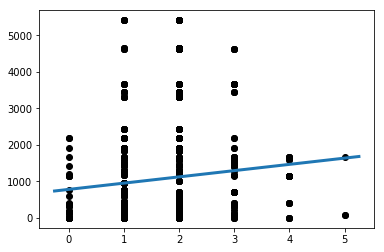

In [7]:
draw_plot(re[2][1], re[2][0])

In [8]:
features = Autotyp().features_list
ignore_list = ['Alignment']
result = pandas.DataFrame()
processed_features = []
subfeatures = []
regressions = []
for feature in features:
    print(feature)
    print('###########')
    if feature in ignore_list:
        print('Ignoring...')
        continue
    res = count_stats(feature)
    print('##########################')
    for r in res:
        processed_features.append(r[3])
        subfeatures.append(r[2])
        regressions.append(r[0].pvalue)

Agreement
###########
Elevations for these languages were not found: Mari, Liberian Grebo, Uradhic, Cree, ~N/A~, Great Andamanese, Malagasic, Nubian, Kanuri-Kanembu
##########################
Alienability
###########
Elevations for these languages were not found: Mari, Liberian Grebo, Uradhic, Great Andamanese, ~N/A~, Malagasic, Nubian, Kanuri-Kanembu
##########################
Alignment
###########
Ignoring...
Alignment_case_splits
###########
Elevations for these languages were not found: Mari, Kamic, Liberian Grebo, Mongolian, Khorasani Kurmanji, Northern Tai, Uradhic, Buriat, ~N/A~, Maduresic, Chewa, Coran, Central Oghuz, Kanuri-Kanembu, West Futuna
##########################
Alignment_per_language
###########
Elevations for these languages were not found: Mari, Kamic, Liberian Grebo, Mongolian, Khorasani Kurmanji, Uradhic, Northern Tai, Buriat, ~N/A~, Maduresic, Coran, Chewa, Central Oghuz, Kanuri-Kanembu, West Futuna
##########################
Clause_linkage
###########
#########

/home/misha/.local/lib/python3.7/site-packages/lingtypology/db_apis.py:215: UserWarning: Unable to find Glottocode for2915
  warnings.warn('Unable to find Glottocode for' + str(LID))


Elevations for these languages were not found: , Mari, Ojibwa, Buriat, Chewa, West Futuna, Kamic, Mongolian, Coran, Zaza, Khorasani Kurmanji, Northern Tai, Nubian, Liberian Grebo, Uradhic, Classical Tibetan, Uzbek, ~N/A~, Maduresic, Malagasic, Kanuri-Kanembu
##########################
Locus_per_language
###########
Elevations for these languages were not found: Mari, Liberian Grebo, Uradhic, Great Andamanese, ~N/A~, Malagasic, Nubian, Kanuri-Kanembu
##########################
Locus_per_macrorelation
###########
Elevations for these languages were not found: Mari, Liberian Grebo, Uradhic, Great Andamanese, ~N/A~, Malagasic, Nubian, Kanuri-Kanembu
##########################
Locus_per_microrelation
###########
Elevations for these languages were not found: Mari, Liberian Grebo, Uradhic, Great Andamanese, ~N/A~, Malagasic, Nubian, Kanuri-Kanembu
##########################
Markers_per_language
###########
Elevations for these languages were not found: Mari, Ojibwa, Liberian Grebo, Mongolian

/home/misha/.local/lib/python3.7/site-packages/lingtypology/db_apis.py:215: UserWarning: Unable to find Glottocode for3000
  warnings.warn('Unable to find Glottocode for' + str(LID))


Elevations for these languages were not found: , Mari, Buriat, Dalecarlian, Mongolian, Low German, Great Andamanese, Central Oghuz, Old Russian, Khorasani Kurmanji, Nubian, Liberian Grebo, Uradhic, Classical Tibetan, Uzbek, ~N/A~, Malagasic, Bolgarian, Kanuri-Kanembu
##########################
NP_structure
###########
Elevations for these languages were not found: , Mari, Buriat, Dalecarlian, Mongolian, Low German, Great Andamanese, Central Oghuz, Old Russian, Khorasani Kurmanji, Nubian, Liberian Grebo, Uradhic, Classical Tibetan, Uzbek, ~N/A~, Malagasic, Bolgarian, Kanuri-Kanembu
##########################
NP_structure_presence
###########
Elevations for these languages were not found: , Mari, Buriat, Dalecarlian, Mongolian, Low German, Great Andamanese, Central Oghuz, Old Russian, Khorasani Kurmanji, Nubian, Liberian Grebo, Uradhic, Classical Tibetan, Uzbek, ~N/A~, Malagasic, Bolgarian, Kanuri-Kanembu
##########################
NP_word_order
###########
Elevations for these languages

In [9]:
result = pandas.DataFrame({
    'Feature': processed_features,
    'Subfeature': subfeatures,
    'P-value': ['%.08f' % r for r in regressions],
})
result

,Feature,Subfeature,P-value
0,Alienability,NPPossBoundNouns.n,0.16724679
1,Alienability,NPAlienableClasses.n,0.13610595
2,Alienability,NPInalienableClasses.n,0.93030019
3,Alienability,NPPossClasses.n,0.62856506
4,Gender,Gender.n,0.83643109
5,Grammatical_markers,Exponence.n,0.00000000
6,Markers_per_language,ExponentialityCase.n,0.23596129
7,Markers_per_language,ExponentialityNegation.n,0.51982518
8,Markers_per_language,ExponentialityNounPlural.n,0.58655458
9,Markers_per_language,ExponentialityTense.n,0.29381860
